# **Project Name  -  Netflix Movies and Tv Shows Project**

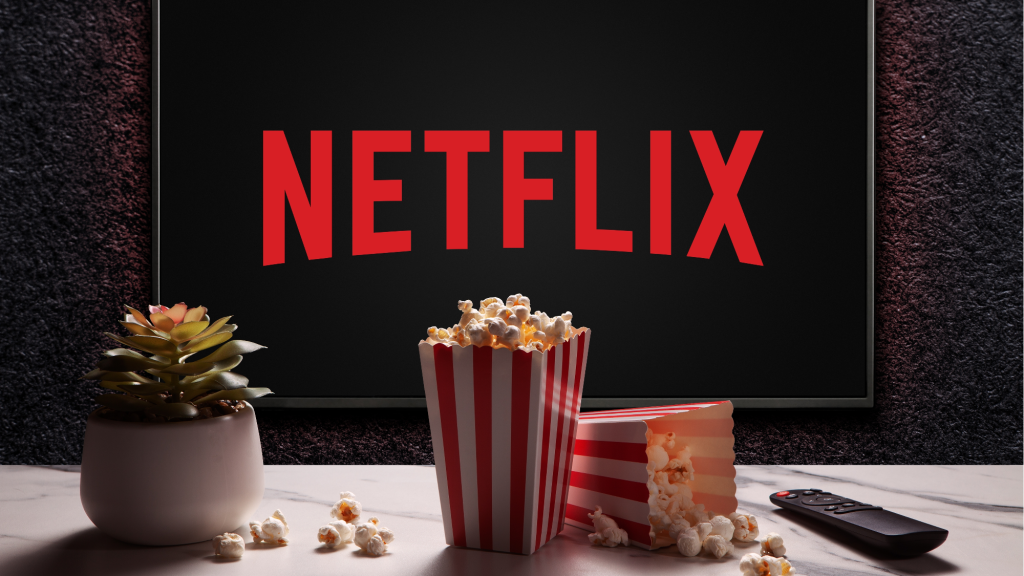

### **Project Type -** EDA
### **Contribution -** Individual

# **Project summary**  - 

This project focuses on analyzing Netflix content (movies and TV shows) as of 2019, using an unsupervised machine approach.
The dataset, sourced from flixable, captures notable trends as a significant increases in the number of TV shows and decreases in movies scince 2010. the dataset provided for this project contains rows-7788 and column-12.

The primary objectives of this project are :
* To perform **exploratory data analysis(EDA)** to understand patterns and trends in Netflix content.
* To analyze **Content availability by country** , identifying what type of shows and movies are offered in different regions.
* To investigate whether **Netflix has shifted its focus** from movies to TV shows in recent years.
* To use **text based features** (like descriptions, geners,etc) to perform **content clustering**, identigying similar shows and movies using natural     language processing techniques and clustering algorithms.
  
The project can be enhanced by integrating external data sources such as IMDB or Rotten tomatoes rating for deeper insights.



# **Project Github link** -

### **Problem Statement** - 
With a rapidly growing and evolving content library, Netflix's catalog now includes a vast number of TV shows and movies, varying across countries and over time.However, users may struggle to discover similar or relevant content, and content planners may lack insights into content distribution and focus trends. 
There is a need to analyze, organize and extract patterns from Netflix's dataset to support decision making and enhance user experience.

### **Business Objective** -
* **Identify trends** in Netflix's content strategy - especially the shift in focus between TV shows and movies over time.
* **Understand content availability** across different countries to support regional content strategies.
* **Cluster similar content** using text-based features (e.g, description, genre) to :
    * improve content recommendation systems.
    * support marketing, tagging and catalog management.
* Generate **data driven insights** that can guide Netflix's future content planning and personalization efforts.

## **Data cleaning / Data wrangling**

In [84]:
# Importing libraries

import pandas as pd
import numpy as np
import requests
import os
import glob
import datetime
import calendar
import matplotlib.pyplot as plt
from zipfile import ZipFile
from io import BytesIO
import seaborn as sb

In [85]:
# Load Dataset

df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv', low_memory = False)

In [86]:
# Dataset first view 

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [87]:
# Dataset Rows and Columns count

num_rows, num_columns = df.shape
print(f"Number of Rows : {num_rows}")
print(f"Number of columns : {num_columns}")

Number of Rows : 7787
Number of columns : 12


In [88]:
# Dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [89]:
# Duplicate values

duplicates = df[df.duplicated()]
print(duplicates)

num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

num_duplicates = df.duplicated().sum()
print(f"Number of duplicate columns: {num_duplicates}")

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []
Number of duplicate rows: 0
Number of duplicate columns: 0


In [90]:
# Missing values / Null values

missing_counts = df.isnull().sum()
print(missing_counts)


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


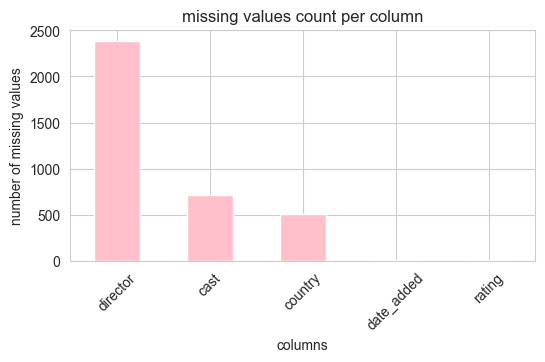

In [91]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

# plot
plt.figure(figsize=(6,3))
missing_counts.plot(kind='bar', color='pink')
plt.title('missing values count per column')
plt.xlabel('columns')
plt.ylabel('number of missing values')
plt.xticks(rotation=45)
plt.show()

 * **Null values are present in director, cast, country, date_added, and rating; Since there are only few null values present in date_added and rating        (10 & 7 respectively) we will remove them from the data.**
 * **No duplicate values exist.**

### **What did you know about your dataset?**

* **Dataset overview**:
   * The dataset contains information about Netflix and titles(movies and Tv shows) as of 2019
   * It includes features like : title type, type(movie/ tv show), realease_year, country, genre, description, cast, director etc.
*  **Shape and structure**:
   * Total records: 7788 rows
   * Total columns: 12
   * Type of feature: mix categorical, text and date data.

* **Missing values**:
  * some columns like cast, director amd country have missing values.
  * columns like title, type, and release_year are mostly completed.
    
* **Content  distribution**:
  * majority of the titles are movies, with a growing number of TV shows on recent years.
  * Significant content is available from untied states, followed by india, the UK and others.

* **Time trend**:
  * Number of TV shows has increased steadily from 2010 to 2019.
  * Number of movies has declined slightly or remained stable in the same period.

* **Text-Based insights**:
  * Genres and descriptions provide strong potential for clustering similar content.
  * titles span across multiple genres like drama, comedy, action etc.
   

In [92]:
# Dataset describe ( descriptive statistics)

df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [93]:
# lets replace few missing values
# Number of null values in date_added.
df.date_added.isnull().sum()

# Remove null values in date_added.
df.dropna(subset=['date_added'], inplace=True)

In [94]:
# Number of null values in rating.
df.rating.isnull().sum()

7

In [95]:
# Remove null values in rating.
df.dropna(subset=['rating'], inplace=True)

In [96]:
# Check the shape of our data.
df.shape

(7770, 12)

### Check Unique Values for each variable.


In [97]:
print('Unique Values in dataset:\n')
print(df.nunique())

Unique Values in dataset:

show_id         7770
type               2
title           7770
director        4047
cast            6817
country          681
date_added      1563
release_year      73
rating            14
duration         216
listed_in        491
description     7752
dtype: int64


In [98]:
#creating a copy of the main dataframe

df = df.copy()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [99]:
# Add few more datetime features

# Create new features to store date, day, month and year seperately.
df["date_added"] = pd.to_datetime(df['date_added'], errors='coerce')  # First convert date_added to date time format.
df['day_added'] = df['date_added'].dt.day            # Compute day.
df['year_added'] = df['date_added'].dt.year          # Compute year.
df['month_added'] = df['date_added'].dt.month        # Compute month.
     

In [100]:
# Final check
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      5394 non-null   object        
 4   cast          7052 non-null   object        
 5   country       7265 non-null   object        
 6   date_added    7682 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
 12  day_added     7682 non-null   float64       
 13  year_added    7682 non-null   float64       
 14  month_added   7682 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1),

In [101]:
# now save the clean file
df.to_csv('df_clean.csv', index = False)

### What all manipulations have you done and insights you found?

 After importing libraries and dataset the manipulation we have done are:
##### **1 - Count the Rows and Columns** - There is 7788 - rows and 12- columns
##### **2 - Get dataset information**
##### **3 - Find duplicate values in dataset**  - as per dataset there is no duplicate value in any row and column    
##### **4 - Find missing values** - There are missing values in column Director,cast,country,date added,rating and present through visualisation and                                          then drop the missing values from date added and rating columns and  missing values in other columns will be                                             handle later
##### **5 - Dataset describe** - In this we do descritive statistics
##### **6 - Check the unqiue values**
##### **7 - Create new features to store date, day, month and year seperately.**
